<a href="https://colab.research.google.com/github/sundar911/sa_farmers_protest/blob/main/sa_fp_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 

## Setting up imports and twitter API

In [ ]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime

In [ ]:
access_token = "XXX"
access_token_secret = "XXX"
consumer_key = "XXX"
consumer_secret = "XXX"

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

## Scraping tweets using tweepy and creating a pandas dataframe

In [ ]:
topic = "farmers protest (#farmersprotest OR #FarmersProtest OR #FarmersBill OR #FarmersBill2020 OR #FarmLaws OR #FarmersProtests OR #FarmLaws2020) lang:en"
query = tw.Cursor(api.search, q = topic).items(3000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

In [ ]:
df = pd.DataFrame.from_dict(tweets)
df.tail()

,Tweet,Timestamp
2995,RT @YourAnonCentral: Farmers in India continue...,2021-01-27 04:56:04
2996,RT @YourAnonCentral: Farmers in India continue...,2021-01-27 04:55:37
2997,RT @YourAnonCentral: Farmers in India continue...,2021-01-27 04:55:34
2998,RT @YourAnonCentral: Farmers in India continue...,2021-01-27 04:55:23
2999,RT @YourAnonCentral: Farmers in India continue...,2021-01-27 04:55:21


In [ ]:
df.to_csv('dataset.csv', index=False)

## Cleaning the tweets

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['rt', 'th']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet.lower()
    processed_tweet = " ".join(re.sub('@[^\s]+', '', processed_tweet).split()) #removing usernames -> recognising an @ followed by characters that aren't \s ie they arent white spaces
    processed_tweet = " ".join(re.sub(r'#\w+ ?', '', processed_tweet).split()) #removing hashtags 
    processed_tweet = " ".join(re.sub(r'http\S+', '', processed_tweet).split()) #removing URLs
    processed_tweet = " ".join(re.sub('[^-9A-Za-z ]', '', processed_tweet).split()) #removing punctuation
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words) #removing standard nltk stopwords
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords) #removing custom stopwords
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split()) 
    processed_tweet = " ".join(re.sub('\s+', ' ', processed_tweet).split()) #removing redundant white spaces
    return(processed_tweet)
    

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,RT @Dubeyjilive: Police barricading removed fr...,2021-01-27 16:53:49,police barricading removed thakur bhanu pratap...
1,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:53:42,deep sidhu lakha sidhana sukhpreet udhoke bir ...
2,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:52:45,deep sidhu lakha sidhana sukhpreet udhoke bir ...
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 16:52:44,farmer seen taking tent chilla border followin...
4,RT @nsui: KSU activists held the protest acros...,2021-01-27 16:52:29,ksu activist held protest across state support...


## Finding sentiment and assigning labels

In [ ]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity
0,RT @Dubeyjilive: Police barricading removed fr...,2021-01-27 16:53:49,police barricading removed thakur bhanu pratap...,0.000000,0.000000
1,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:53:42,deep sidhu lakha sidhana sukhpreet udhoke bir ...,0.166667,0.600000
2,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:52:45,deep sidhu lakha sidhana sukhpreet udhoke bir ...,0.166667,0.600000
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 16:52:44,farmer seen taking tent chilla border followin...,0.000000,0.100000
4,RT @nsui: KSU activists held the protest acros...,2021-01-27 16:52:29,ksu activist held protest across state support...,-0.166667,0.433333


In [ ]:
labels = np.empty(len(df))

for i in range(0,len(df)):
    if df.polarity[i] > 0:
        labels[i] = 1 
    elif df.polarity[i] < 0:
        labels[i] = -1
    elif df.polarity[i] == 0:
        labels[i] = 0

In [ ]:
labels

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
df['label'] = labels
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity,label
0,RT @Dubeyjilive: Police barricading removed fr...,2021-01-27 16:53:49,police barricading removed thakur bhanu pratap...,0.000000,0.000000,0.0
1,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:53:42,deep sidhu lakha sidhana sukhpreet udhoke bir ...,0.166667,0.600000,1.0
2,"RT @TheQuint: #FarmersProtest | ""Deep Sidhu, L...",2021-01-27 16:52:45,deep sidhu lakha sidhana sukhpreet udhoke bir ...,0.166667,0.600000,1.0
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 16:52:44,farmer seen taking tent chilla border followin...,0.000000,0.100000,0.0
4,RT @nsui: KSU activists held the protest acros...,2021-01-27 16:52:29,ksu activist held protest across state support...,-0.166667,0.433333,-1.0


## EDA

In [ ]:
df.describe() 

,polarity,subjectivity,label
count,3000.000000,3000.000000,3000.000000
mean,0.009338,0.253869,0.097000
std,0.149111,0.255827,0.509586
min,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.000000
75%,0.000000,0.500000,0.000000
max,0.900000,1.000000,1.000000


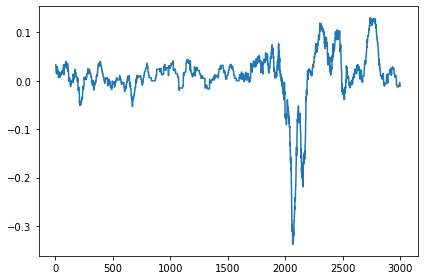

In [ ]:
plt.plot(df.polarity.rolling(40, min_periods=5).mean())
plt.tight_layout()
plt.show()

/Users/sundarraghavanl/opt/anaconda2/envs/new_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


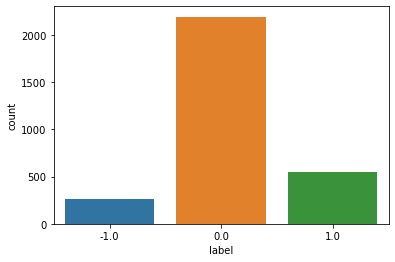

In [ ]:
import seaborn as sns
sns.countplot(df['label'])
plt.show()

## Building a classifier 

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

### Naive Bayes classifier

In [ ]:
pipeline_bayes = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline_bayes.fit(msg_train,label_train)
predictions_bayes = pipeline_bayes.predict(msg_test)
print(classification_report(predictions_bayes,label_test))
print(confusion_matrix(predictions_bayes,label_test))
print(accuracy_score(predictions_bayes,label_test))


              precision    recall  f1-score   support

        -1.0       0.78      0.85      0.81        53
         0.0       0.96      0.96      0.96       428
         1.0       0.92      0.88      0.90       119

    accuracy                           0.93       600
   macro avg       0.88      0.90      0.89       600
weighted avg       0.93      0.93      0.93       600

[[ 45   8   0]
 [ 10 409   9]
 [  3  11 105]]
0.9316666666666666


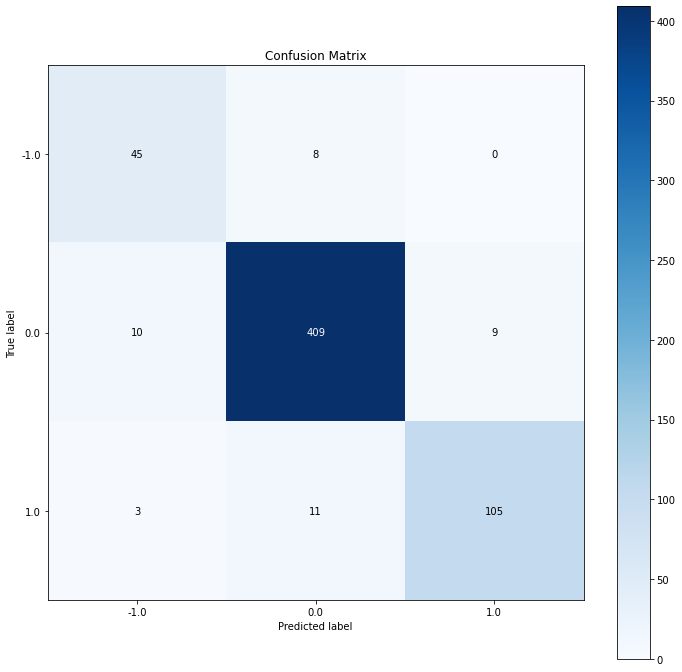

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(predictions_bayes, label_test, figsize = (12,12))
plt.show()

In [ ]:
print(accuracy_score(predictions_bayes,label_test))

0.9316666666666666


### Logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline_logreg.fit(msg_train,label_train)
log_predictions = pipeline_logreg.predict(msg_test)
print(classification_report(log_predictions,label_test))
print(confusion_matrix(log_predictions,label_test))
print(accuracy_score(log_predictions,label_test))

              precision    recall  f1-score   support

        -1.0       0.76      1.00      0.86        37
         0.0       1.00      0.95      0.97       456
         1.0       0.90      0.97      0.93       107

    accuracy                           0.96       600
   macro avg       0.88      0.97      0.92       600
weighted avg       0.96      0.96      0.96       600

[[ 37   0   0]
 [ 11 433  12]
 [  1   2 104]]
0.9566666666666667


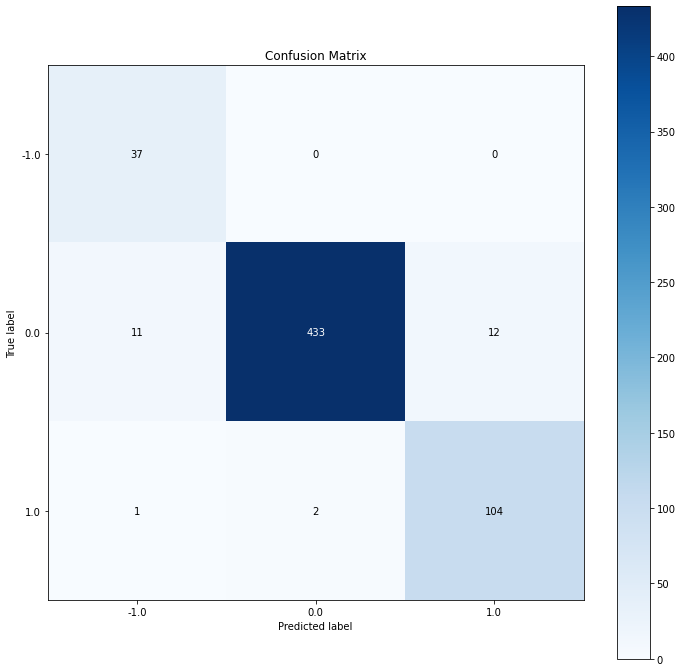

In [ ]:
skplt.metrics.plot_confusion_matrix(log_predictions, label_test, figsize = (12,12))
plt.show()

## Most used words

### Positive

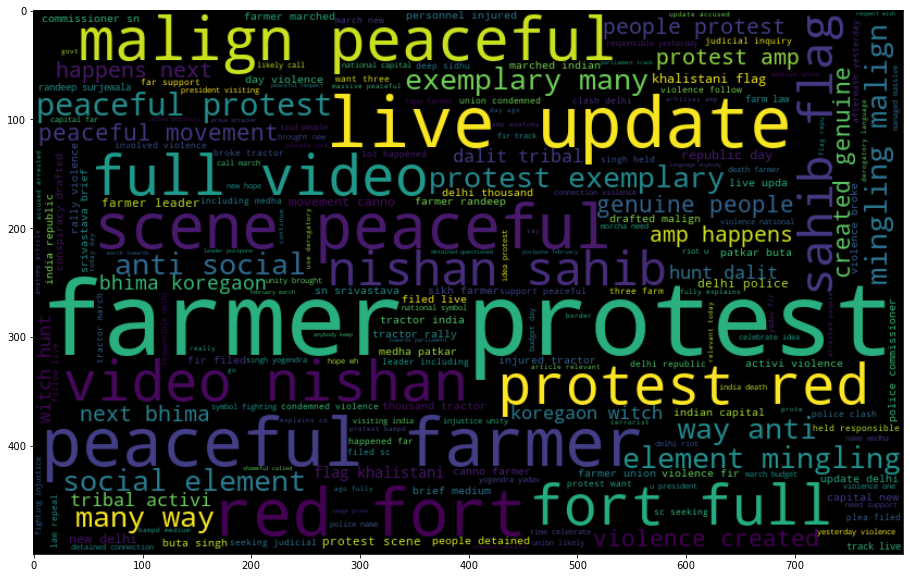

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == 1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Negative

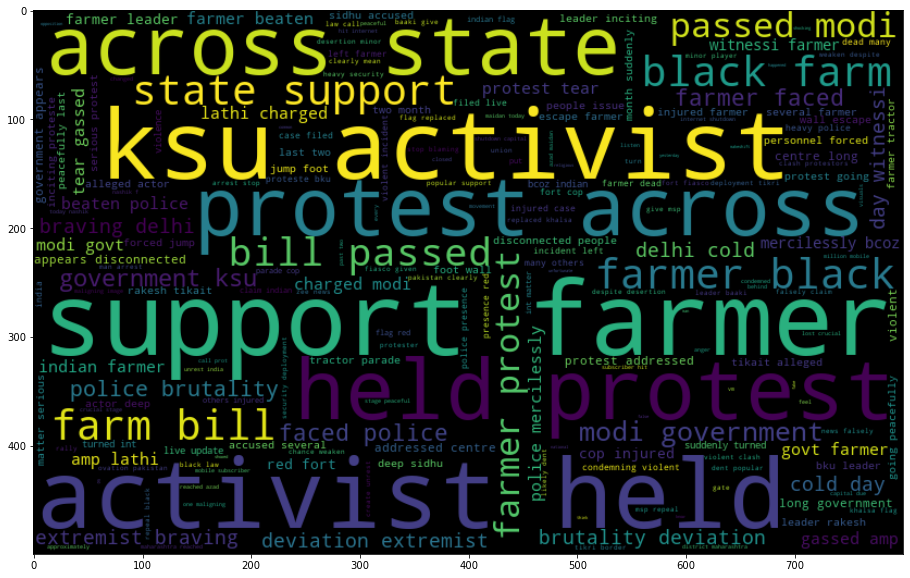

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == -1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()